In [116]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# deep learning
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import plot_model 


# sklearn functionalities
from sklearn.preprocessing import MinMaxScaler


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image


# jupyter theme overrides
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# recet to matplotlib standards
#jtplot.reset()

# matplotlib overrides
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image, IFrame

# Artificial Neural Networks for Time Series Prediction

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>Perceptrons</strong> analogous to neurons in a biological brain. Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it. - <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>


## Neural Network Basics

The basic constitutes of a ANN are **Perceptron**. A perceptron takes an input matrix $X$ and applies weights $W$ to each resulting in a weighted sum. This summed is transformed using an **Activation Function** and passed as the output $y$, also called **activation**. An activation function is a decision making function that determines the presence / importance of particular neural feature. It is (typically) mapped between 0 and 1, where zero mean the feature is not there, while one means the feature is present.

In [117]:
IFrame("./img/perceptron.pdf", width=1000, height=800)

The purpose of the activation function is to introduce non-linearity into the network. Non-linear means that the output cannot be reproduced from a linear combination of the inputs. Since the perceptron is a **linear classifier**, i.e. it can only distinguish between two forms of output (e.g. 0 and 1), it is not capable of solving XOR problems like this

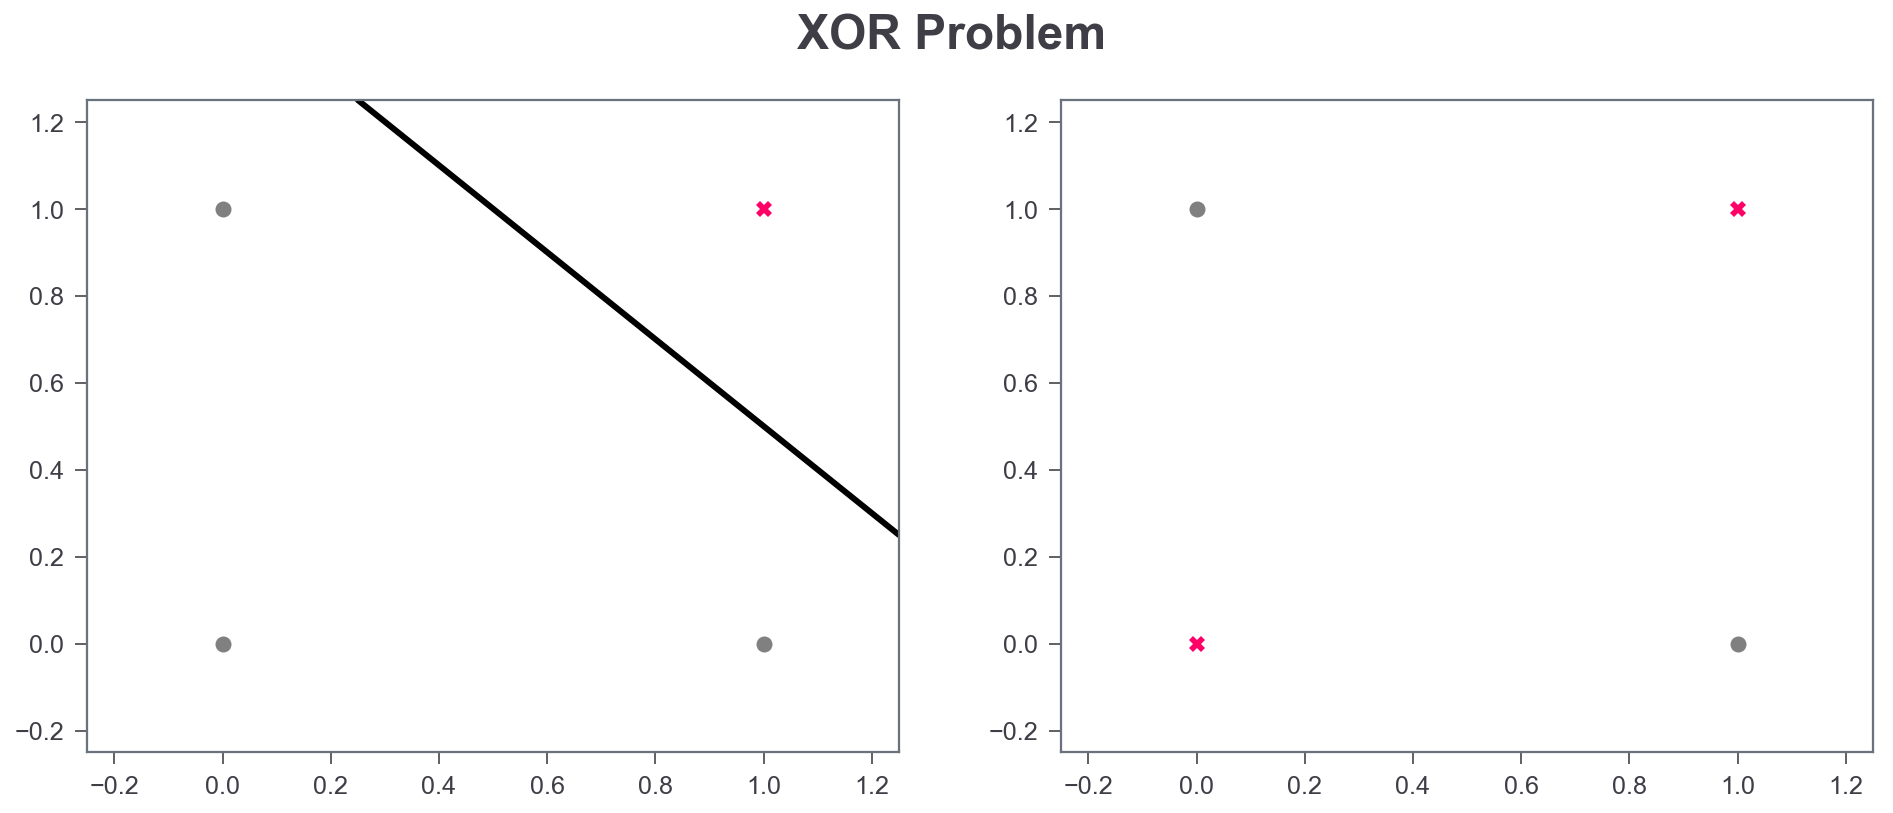

In [78]:
# initialize figur and axes
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(16, 6));
fig.suptitle('XOR Problem', fontsize=24, fontweight='bold')

# classifiable plot
axes[0].plot([0,0,1], [0,1,0], 'o', color='grey')
axes[0].plot([1], [1], 'X', color='#ff0066')
axes[0].plot([0.25, 1.25], [1.25, 0.25], color='black')
axes[0].set_xlim((-0.25, 1.25))
axes[0].set_ylim((-0.25, 1.25))

# unclassifiable plot
axes[1].plot([0,1], [1,0], 'o', color='grey')
axes[1].plot([0, 1], [0, 1], 'X', color='#ff0066')
axes[1].set_xlim((-0.25, 1.25))
axes[1].set_ylim((-0.25, 1.25))
plt.savefig('./img/xor_problem.png')
plt.show()

The limitations of the perceptron to estimate non-linear relationships is solved by chaining together multiple perceptrons to form a network, an artificial neural network. The same input pass through principle as for a single perceptron applies for all network nodes which will eventually result in the output estimate $\hat{y}$.

In [5]:
IFrame("./img/network.pdf", width=1000, height=800)

NameError: name 'IFrame' is not defined

The estimate $\hat{y}$ is then compared to the actual observation $y$ using a <strong>Cost Function</strong> $E$ which computes the sum of squared errors. 

In [6]:
IFrame("./img/error_computation.pdf", width=1000, height=800)

NameError: name 'IFrame' is not defined

If the cost function is minimized with respect to all weight parameters in $W$ the neural network learns the most effective (cheapest) representation of the data that leads to the desired result $y$. According to each weight's contribution to the total error $\delta E / \delta w_{ij}$ this error is propagated back through the network to the corresponding which which are than adjusted by a <strong>learning rate</strong> $\eta$. This process is called <strong>Back Propagation</strong> since the errors are propagated back through the network. The optimal parameter constellati0on is than found by the <strong>Gradient Descent</strong> algorithm

1. initialize with weights $w_{ij}^{(0)}$
2. for s = 1 to S do:
3.     compute $E[w_{ij}^{(s-1)}]$
4.     compute $w_{ij}^{(s)} = w_{ij}^{(s-1)} - \eta \frac{\partial E}{\partial w_{ij}^{(s)}}$   

until $E$ is sufficiently small

In [7]:
IFrame("./img/gradient_descent.pdf", width=1000, height=800)

NameError: name 'IFrame' is not defined

## A Supervised Learning Task

Time series prediction problems are inherently different from supervised learning problems in that obervastions posses a timely ordering and no observeable input. Thus, the time series prediction problem has to be converted into a regression problem.

A supervised learing problem requires data of the form $(X, y)$ where $y$ is the observeable output and $X$ is a matrix of input data which is assumed to cause the observed output. Since the output variable $y$ is continuous this problem is called a supervised regression problem.

In [79]:
# set seed
np.random.seed(7)

# import data set
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values

# using keras often requires the data type float32
data = data.astype('float32')

# slice the data
train = data[0:120, :]   # length 120
test = data[120:, :]     # length 24

The <code>prepare_data</code> function will be used to transform the time series into a regression problem. The <code>lags</code> argument takes an integer which corresponds the the number of previous time steps to use as input variables to predict the next time period. The default value is one but will be changed in a next iteration.

With the default setting a data set will be created where $X$ is the number of passengers at time $t$ and $y$ is the number of passengers at time $t+1$.

In [81]:
def prepare_data(data, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)

In [93]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention

The data set now has the following form
<pre>
X       y
112     118
118     132
132     129
129     121
121     135
</pre>
That is, the function has successfully shifted the data for one time step and saved this new shifted series to an array.

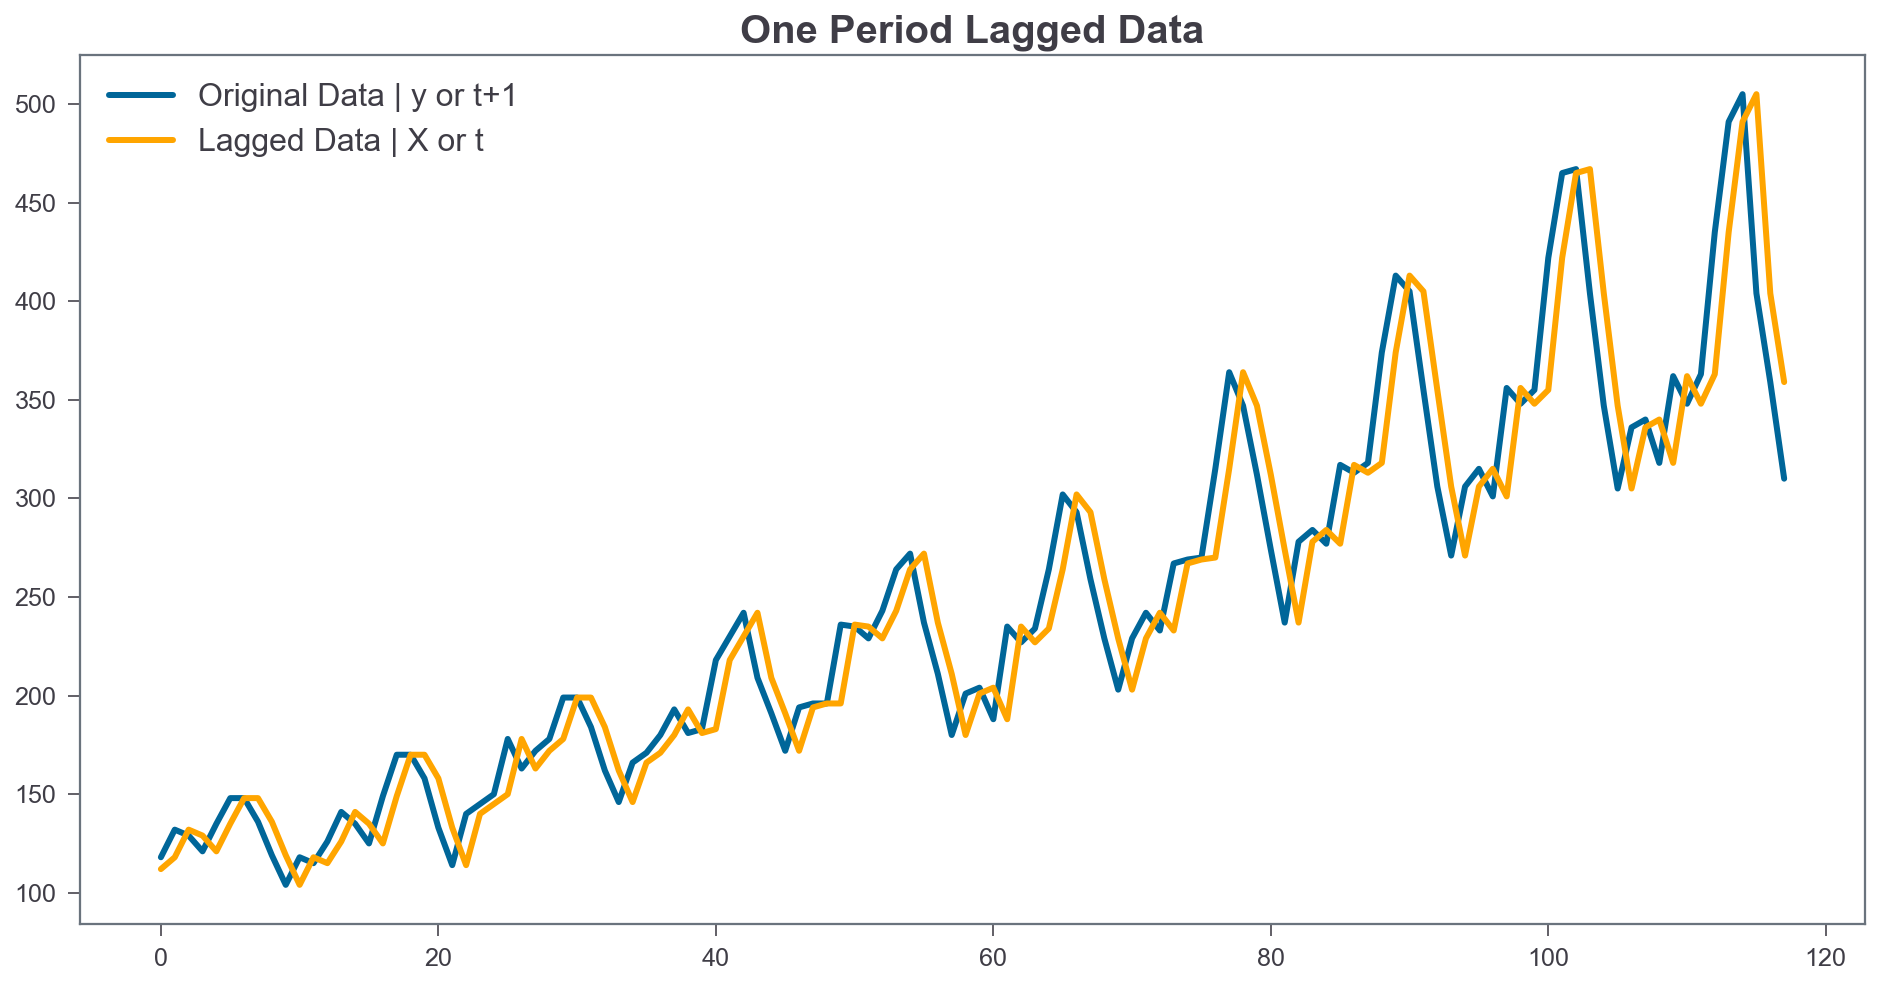

In [94]:
# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
plt.savefig('./img/ann_training.png')
plt.show()

## Multilayer Perceptron Network

As previously, the data is sliced up into a <code>train</code> and <code>test</code> set to evaluate the performance of a two-year-ahead forecast.

The first simple network will have one input (size of the <code>lags</code> variable), one hidden layer with 8 neurons and an output layer. The model is fitted using the MSE criterion and rectified linear units as activation function

In [95]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 20993.2579
Epoch 2/200
 - 0s - loss: 13064.8104
Epoch 3/200
 - 0s - loss: 7301.2862
Epoch 4/200
 - 0s - loss: 3695.2964
Epoch 5/200
 - 0s - loss: 1887.7513
Epoch 6/200
 - 0s - loss: 1140.9039
Epoch 7/200
 - 0s - loss: 903.6475
Epoch 8/200
 - 0s - loss: 840.3275
Epoch 9/200
 - 0s - loss: 829.3714
Epoch 10/200
 - 0s - loss: 824.4897
Epoch 11/200
 - 0s - loss: 827.3767
Epoch 12/200
 - 0s - loss: 831.7215
Epoch 13/200
 - 0s - loss: 827.0410
Epoch 14/200
 - 0s - loss: 832.9047
Epoch 15/200
 - 0s - loss: 830.1006
Epoch 16/200
 - 0s - loss: 829.9468
Epoch 17/200
 - 0s - loss: 828.1293
Epoch 18/200
 - 0s - loss: 847.4714
Epoch 19/200
 - 0s - loss: 830.6606
Epoch 20/200
 - 0s - loss: 828.3521
Epoch 21/200
 - 0s - loss: 833.4614
Epoch 22/200
 - 0s - loss: 830.5339
Epoch 23/200
 - 0s - loss: 826.0274
Epoch 24/200
 - 0s - loss: 832.9789
Epoch 25/200
 - 0s - loss: 833.4564
Epoch 26/200
 - 0s - loss: 833.2696
Epoch 27/200
 - 0s - loss: 844.4330
Epoch 28/200
 - 0s - loss: 84

In [96]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.55 MSE (28.58 RMSE)
Test Score: 2799.01 MSE (52.91 RMSE)


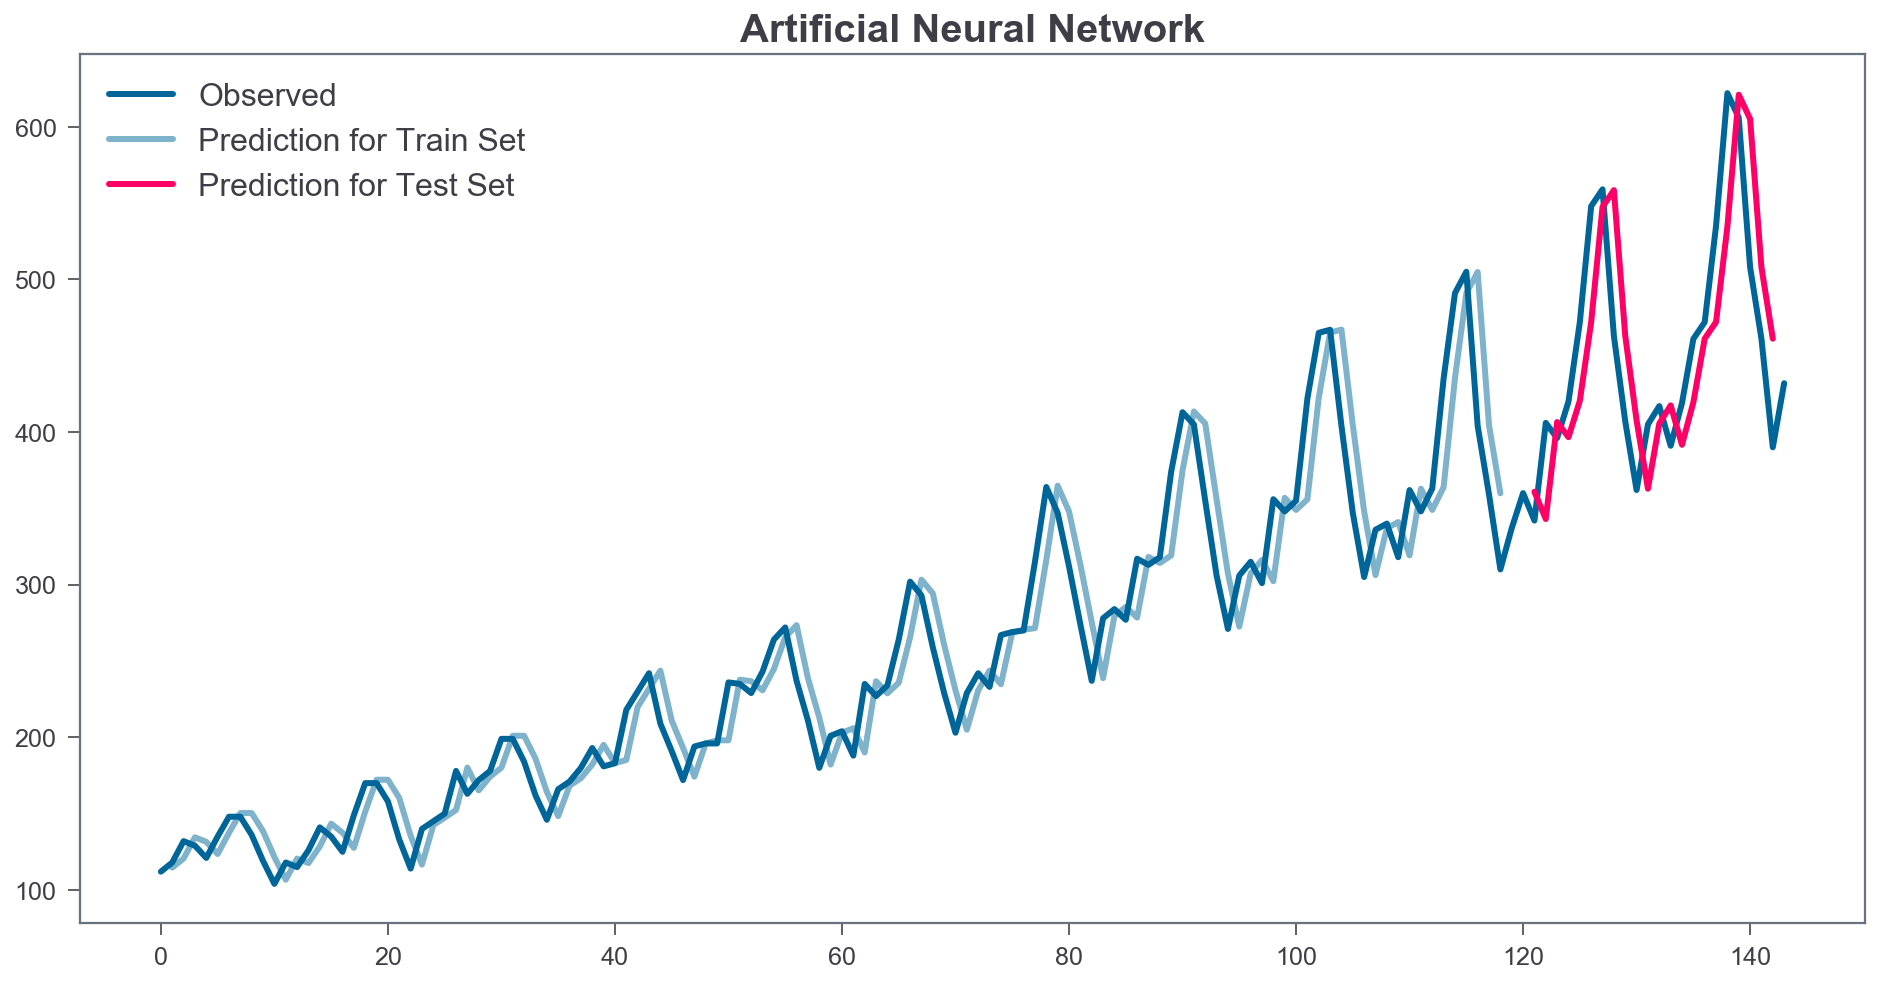

In [98]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.savefig('./img/ann_forecast.png')
plt.show()

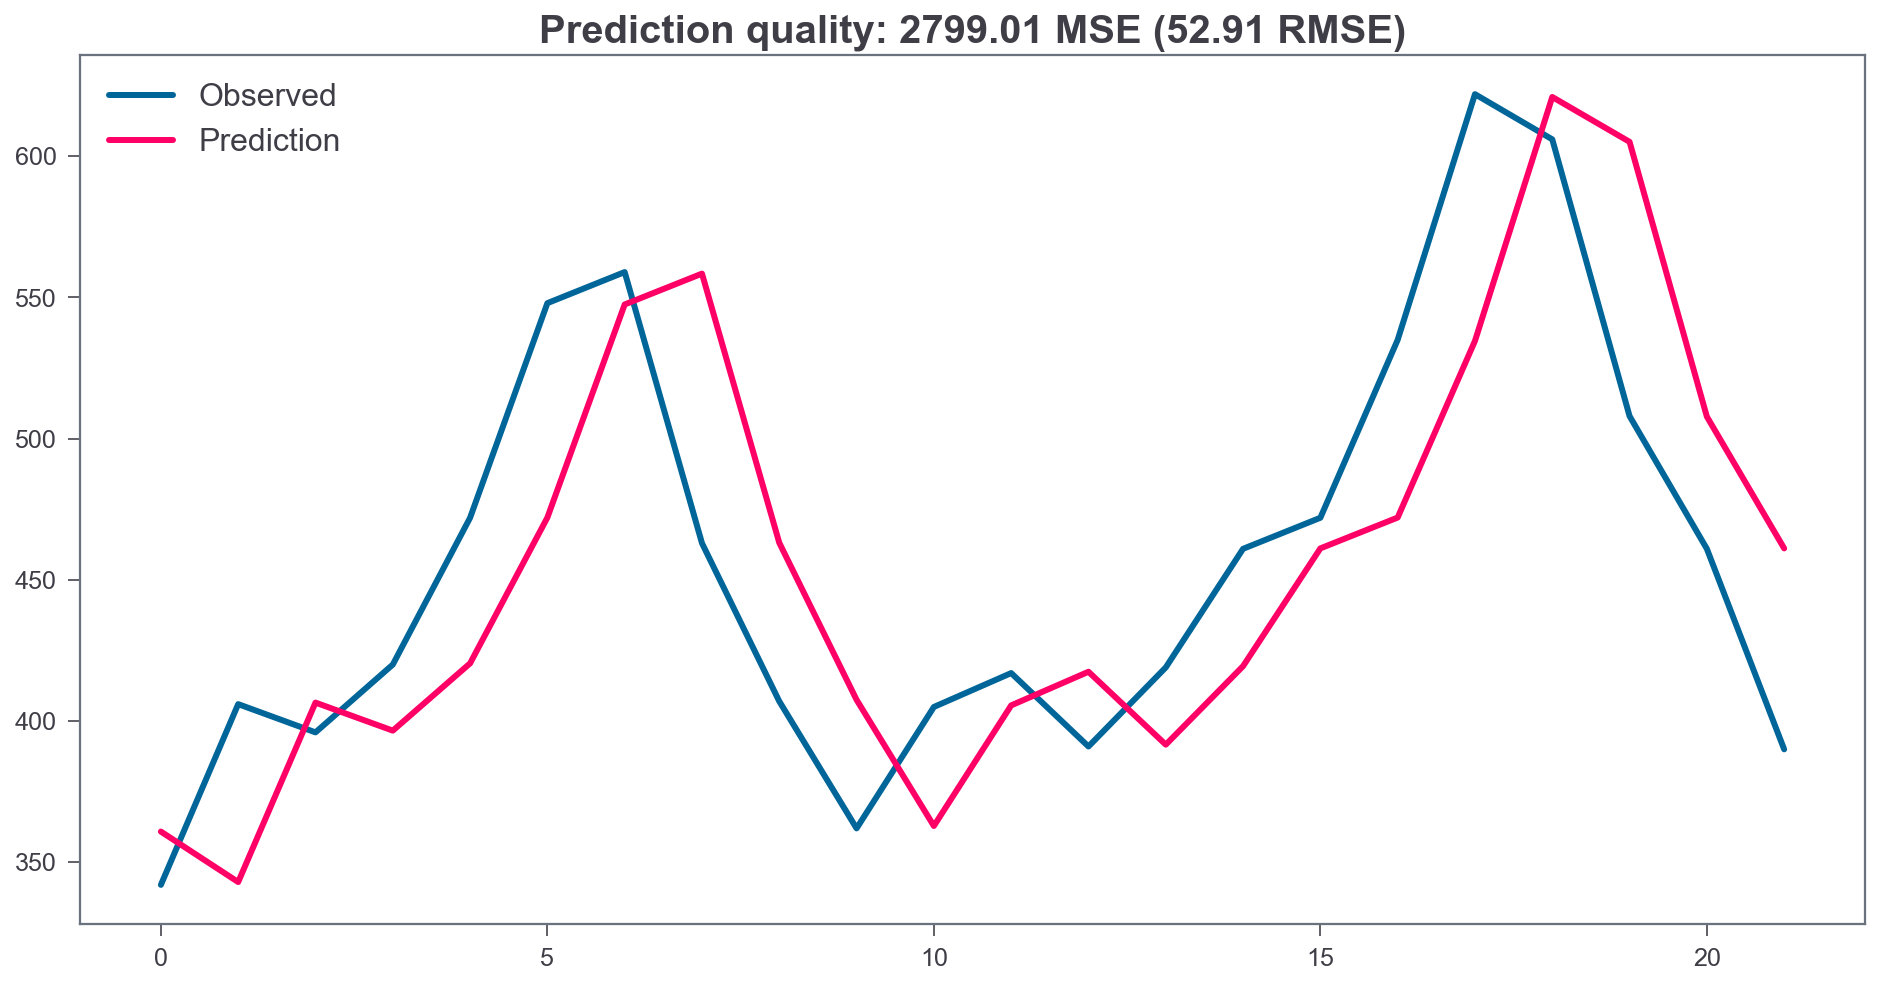

In [99]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='best');
plt.savefig('./img/ann_close.png')
plt.show()

Since the neural network has only been fed by the last observation, it did not have much choice but to learn to apply observation $t$ for the prediction of $t+1$.

## Multilayer perceptron with window

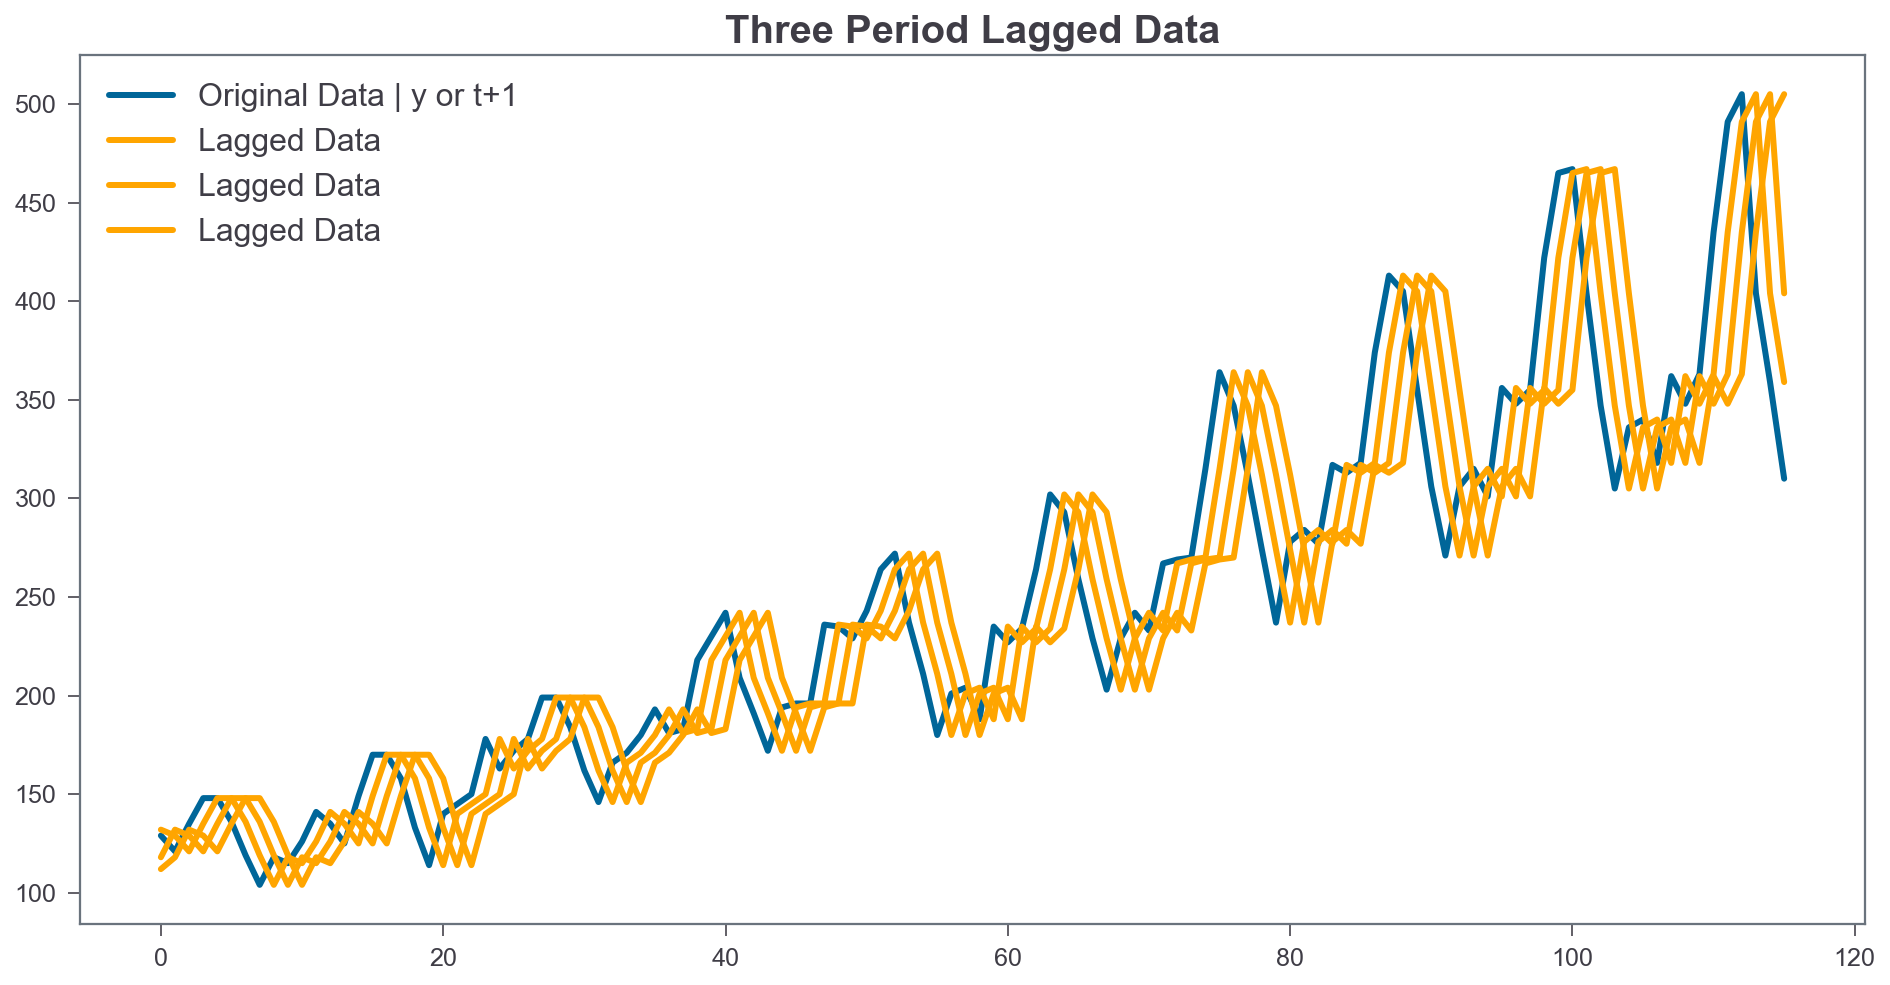

In [100]:
# reshape and lag shift the dataset
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data', color='orange')
plt.legend(loc='best')
plt.title('Three Period Lagged Data')
plt.savefig('./img/ann3_training.png')
plt.show()

In [101]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(4, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 2s - loss: 42132.2141
Epoch 2/400
 - 0s - loss: 14378.2841
Epoch 3/400
 - 0s - loss: 3377.9690
Epoch 4/400
 - 0s - loss: 1559.8246
Epoch 5/400
 - 0s - loss: 1464.8480
Epoch 6/400
 - 0s - loss: 1459.6385
Epoch 7/400
 - 0s - loss: 1467.8797
Epoch 8/400
 - 0s - loss: 1457.6085
Epoch 9/400
 - 0s - loss: 1435.7264
Epoch 10/400
 - 0s - loss: 1427.4656
Epoch 11/400
 - 0s - loss: 1428.5120
Epoch 12/400
 - 0s - loss: 1411.4047
Epoch 13/400
 - 0s - loss: 1400.8663
Epoch 14/400
 - 0s - loss: 1391.7514
Epoch 15/400
 - 0s - loss: 1379.6705
Epoch 16/400
 - 0s - loss: 1349.9368
Epoch 17/400
 - 0s - loss: 1349.9446
Epoch 18/400
 - 0s - loss: 1324.2013
Epoch 19/400
 - 0s - loss: 1338.2252
Epoch 20/400
 - 0s - loss: 1304.4336
Epoch 21/400
 - 0s - loss: 1326.1460
Epoch 22/400
 - 0s - loss: 1257.5326
Epoch 23/400
 - 0s - loss: 1256.1748
Epoch 24/400
 - 0s - loss: 1240.8383
Epoch 25/400
 - 0s - loss: 1197.9815
Epoch 26/400
 - 0s - loss: 1084.2772
Epoch 27/400
 - 0s - loss: 1020.7608
Epoch 28

Epoch 225/400
 - 0s - loss: 680.9572
Epoch 226/400
 - 0s - loss: 695.4978
Epoch 227/400
 - 0s - loss: 698.0176
Epoch 228/400
 - 0s - loss: 712.0098
Epoch 229/400
 - 0s - loss: 768.0594
Epoch 230/400
 - 0s - loss: 778.3111
Epoch 231/400
 - 0s - loss: 743.6142
Epoch 232/400
 - 0s - loss: 725.8941
Epoch 233/400
 - 0s - loss: 720.5628
Epoch 234/400
 - 0s - loss: 750.8280
Epoch 235/400
 - 0s - loss: 675.0332
Epoch 236/400
 - 0s - loss: 704.1442
Epoch 237/400
 - 0s - loss: 707.0302
Epoch 238/400
 - 0s - loss: 689.4442
Epoch 239/400
 - 0s - loss: 688.9341
Epoch 240/400
 - 0s - loss: 706.8858
Epoch 241/400
 - 0s - loss: 704.1700
Epoch 242/400
 - 0s - loss: 714.7659
Epoch 243/400
 - 0s - loss: 702.7816
Epoch 244/400
 - 0s - loss: 711.4189
Epoch 245/400
 - 0s - loss: 689.9410
Epoch 246/400
 - 0s - loss: 712.9127
Epoch 247/400
 - 0s - loss: 715.2539
Epoch 248/400
 - 0s - loss: 669.4953
Epoch 249/400
 - 0s - loss: 649.8199
Epoch 250/400
 - 0s - loss: 738.6957
Epoch 251/400
 - 0s - loss: 634.4558
E

In [102]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 661.49 MSE (25.72 RMSE)
Test Score: 1926.99 MSE (43.90 RMSE)


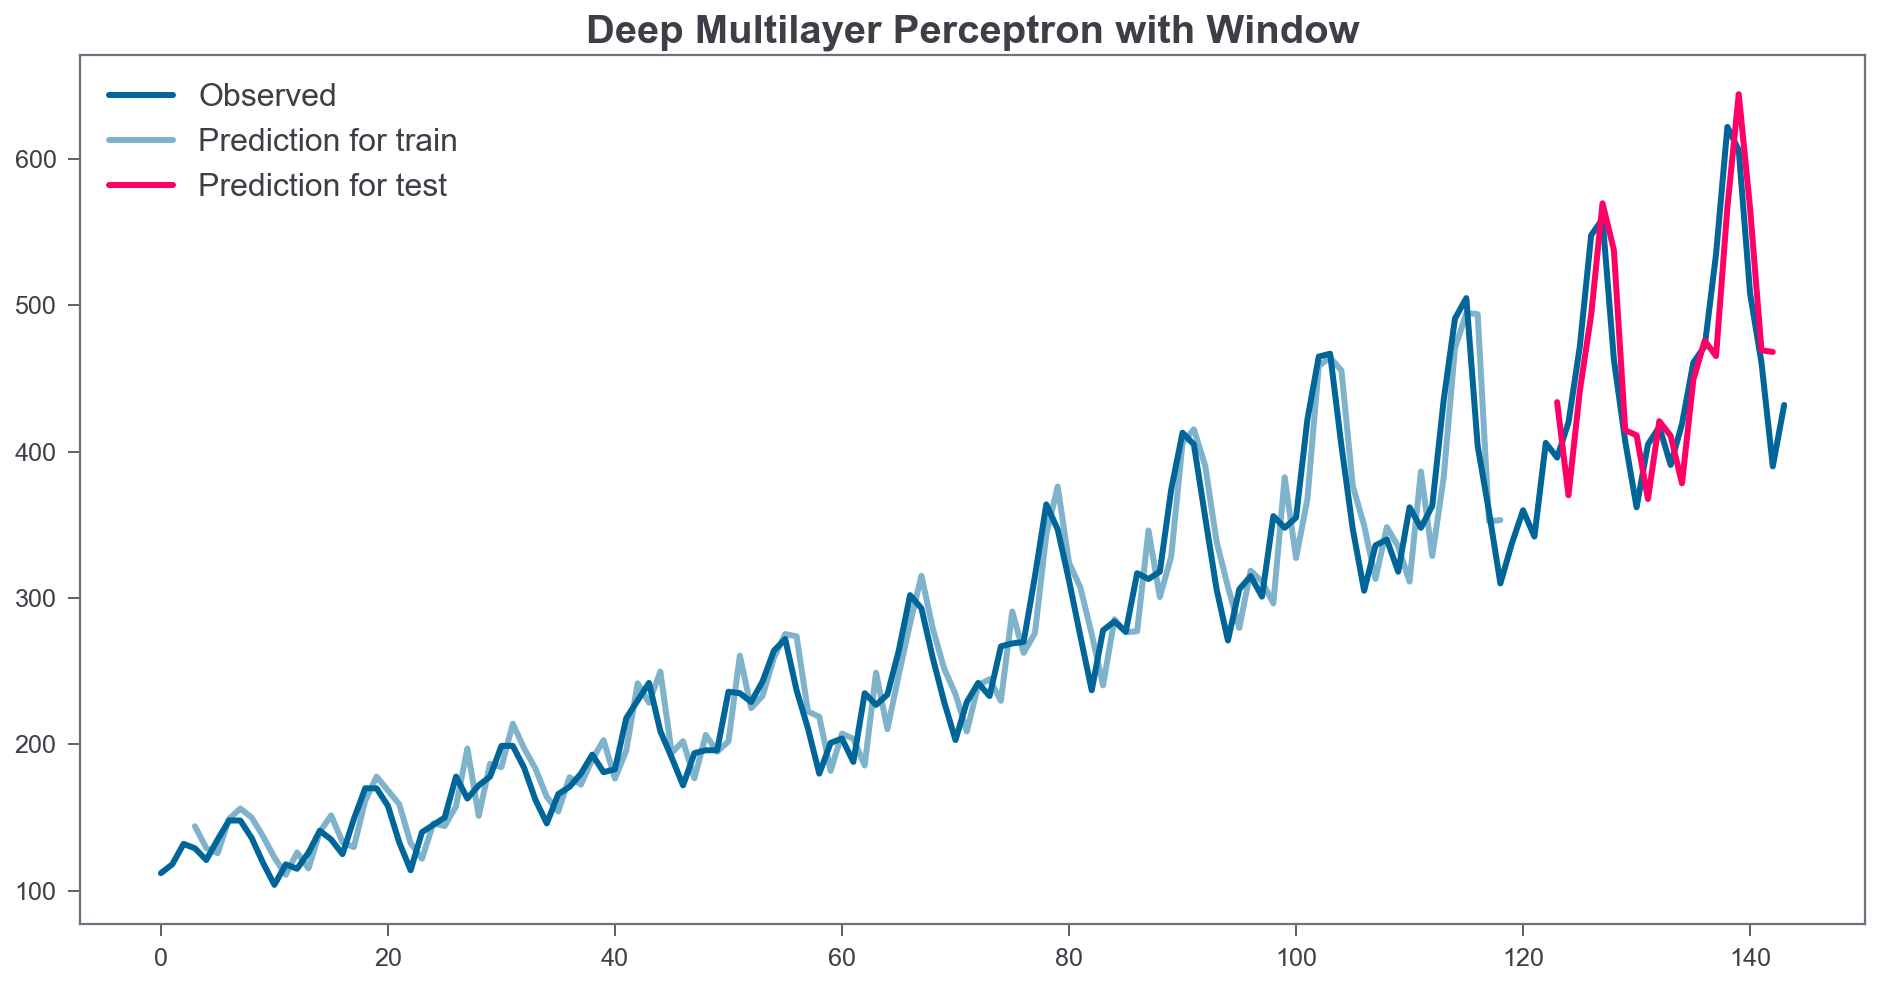

In [107]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best')
plt.title('Deep Multilayer Perceptron with Window')
plt.savefig('./img/ann3_forecast.png')
plt.show()

In [105]:
y_test

array([ 396.,  420.,  472.,  548.,  559.,  463.,  407.,  362.,  405.,
        417.,  391.,  419.,  461.,  472.,  535.,  622.,  606.,  508.,
        461.,  390.], dtype=float32)

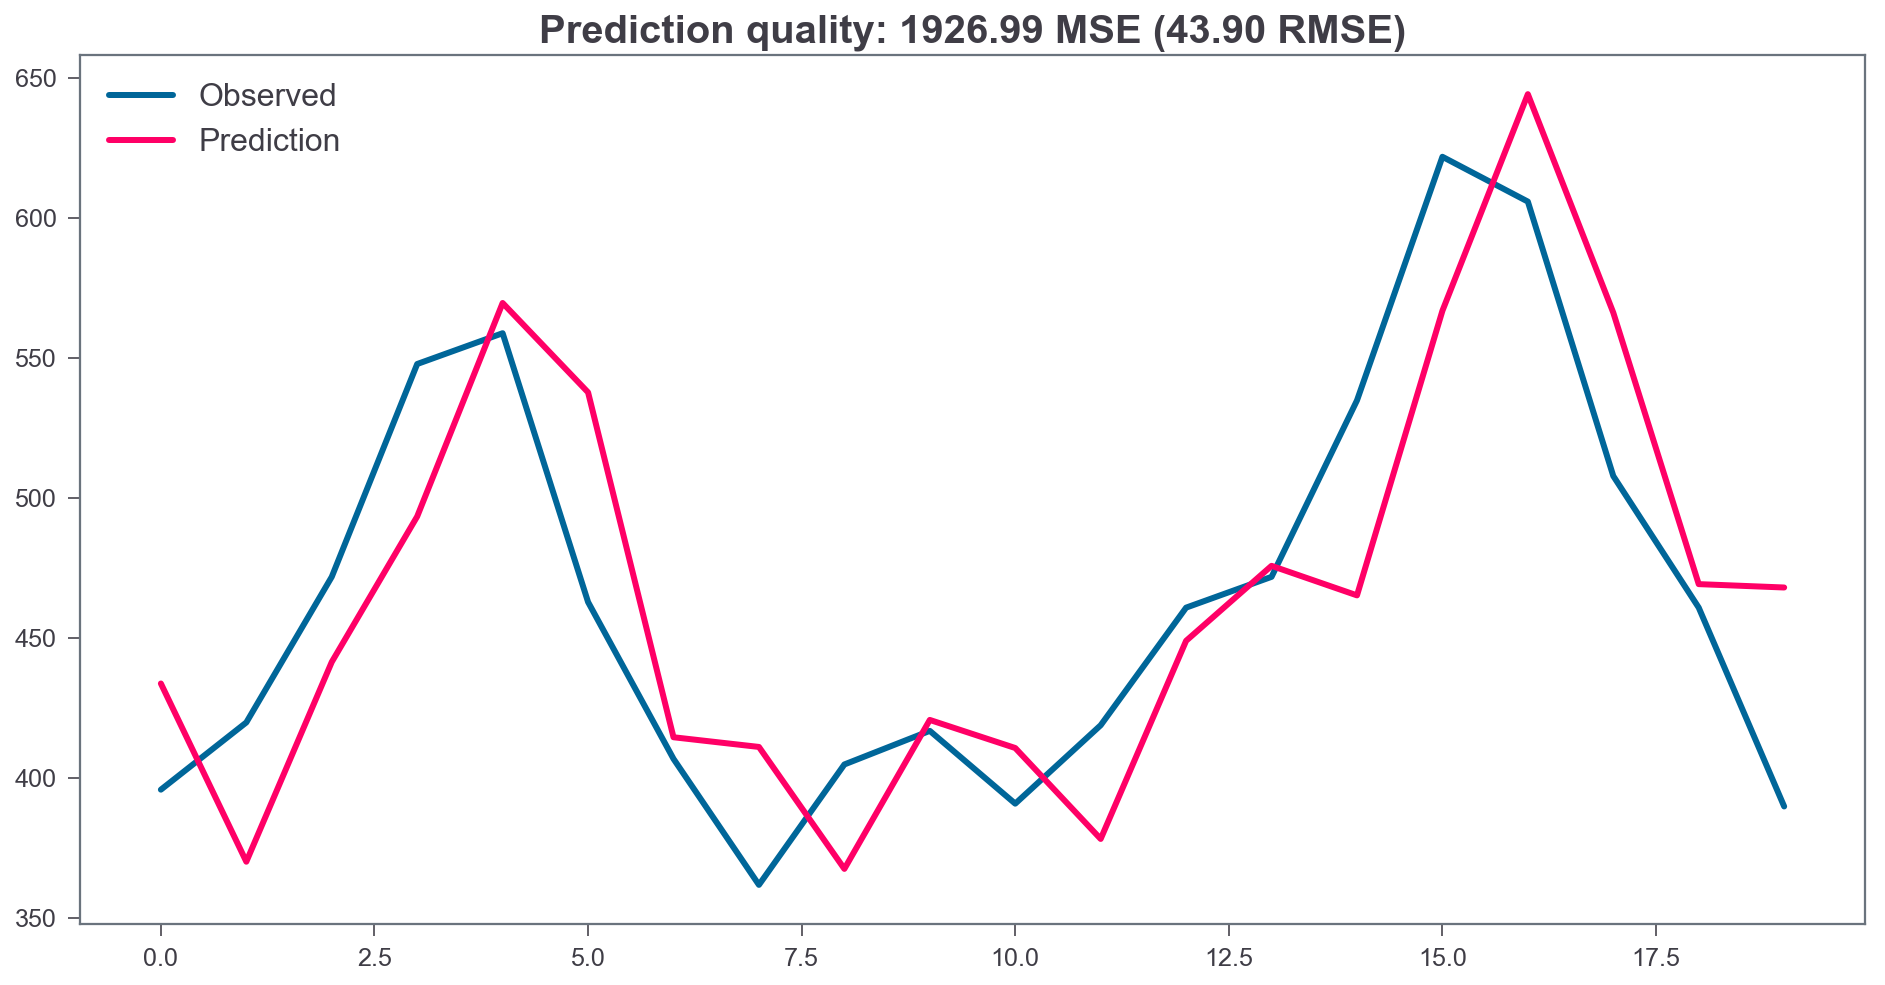

In [108]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.savefig('./img/ann3_close.png')
plt.show()

# LSTM Recurrent Neural Network

Long short-term memory (LSTM) is a recurrent neural network (RNN) architecture that remembers values over arbitrary intervals. Stored values are not modified as learning proceeds. RNNs allow forward and backward connections between neurons. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. - <a href="https://en.wikipedia.org/wiki/Long_short-term_memory">Wikipedia</a>

## Architecture



LSTM blocks contain three or four "gates" that control information flow. These gates are implemented using the logistic function to compute a value between 0 and 1. Multiplication is applied with this value to partially allow or deny information to flow into or out of the memory. For example, an "input" gate controls the extent to which a new value flows into the memory. A "forget" gate controls the extent to which a value remains in memory. An "output" gate controls the extent to which the value in memory is used to compute the output activation of the block. (In some implementations, the input and forget gates are merged into a single gate. The motivation for combining them is that the time to forget is when a new value worth remembering becomes available.)

In [109]:
# fix random seed for reproducibility
np.random.seed(1)

# load the dataset
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]

# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [110]:
# create and fit the LSTM network
mdl = Sequential()
mdl.add(Dense(3, input_shape=(1, lags), activation='relu'))
mdl.add(LSTM(6, activation='relu'))
mdl.add(Dense(1, activation='relu'))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 6s - loss: 0.0503
Epoch 2/100
 - 1s - loss: 0.0184
Epoch 3/100
 - 1s - loss: 0.0161
Epoch 4/100
 - 1s - loss: 0.0145
Epoch 5/100
 - 1s - loss: 0.0129
Epoch 6/100
 - 1s - loss: 0.0114
Epoch 7/100
 - 1s - loss: 0.0103
Epoch 8/100
 - 1s - loss: 0.0093
Epoch 9/100
 - 1s - loss: 0.0081
Epoch 10/100
 - 1s - loss: 0.0072
Epoch 11/100
 - 1s - loss: 0.0063
Epoch 12/100
 - 1s - loss: 0.0059
Epoch 13/100
 - 1s - loss: 0.0052
Epoch 14/100
 - 1s - loss: 0.0050
Epoch 15/100
 - 1s - loss: 0.0047
Epoch 16/100
 - 1s - loss: 0.0042
Epoch 17/100
 - 1s - loss: 0.0038
Epoch 18/100
 - 1s - loss: 0.0038
Epoch 19/100
 - 1s - loss: 0.0036
Epoch 20/100
 - 1s - loss: 0.0034
Epoch 21/100
 - 1s - loss: 0.0033
Epoch 22/100
 - 1s - loss: 0.0036
Epoch 23/100
 - 1s - loss: 0.0031
Epoch 24/100
 - 1s - loss: 0.0031
Epoch 25/100
 - 1s - loss: 0.0031
Epoch 26/100
 - 1s - loss: 0.0032
Epoch 27/100
 - 1s - loss: 0.0030
Epoch 28/100
 - 1s - loss: 0.0032
Epoch 29/100
 - 1s - loss: 0.0032
Epoch 30/100
 - 1s - lo

In [111]:
# make predictions
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 25.35 RMSE
Test Score: 42.79 RMSE


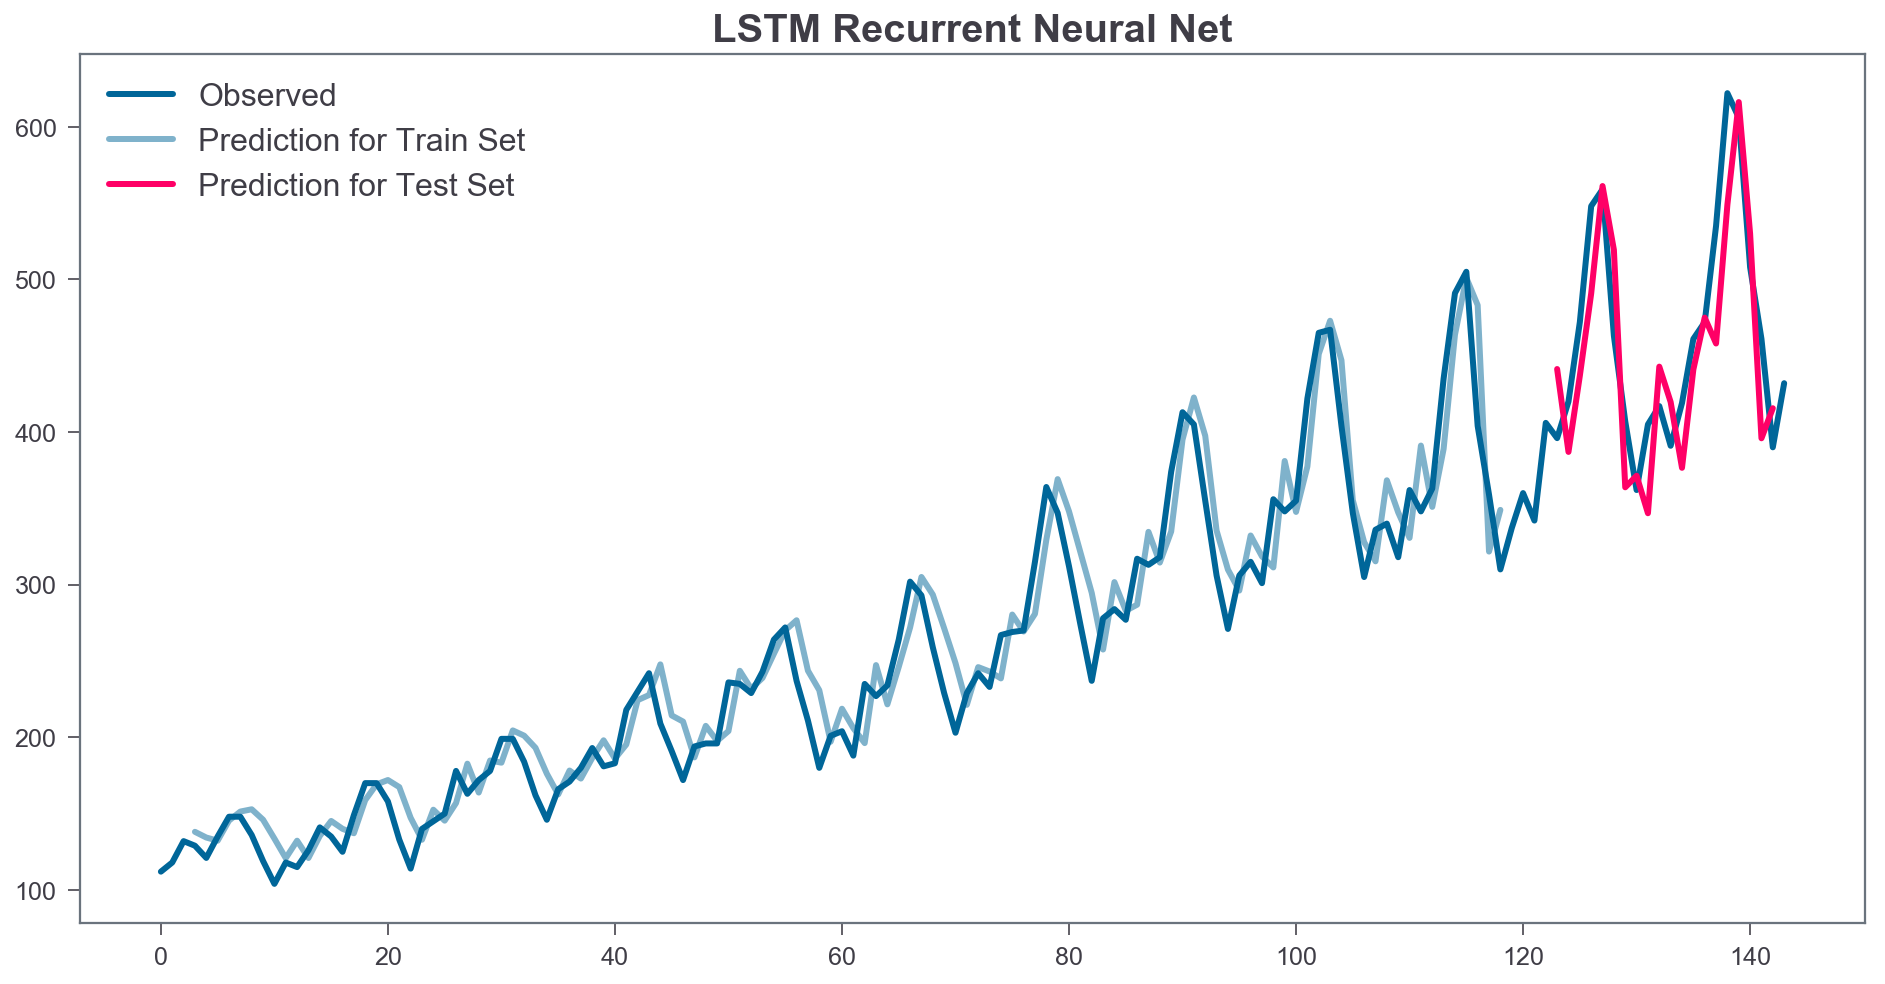

In [114]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict

# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='upper left')
plt.title('LSTM Recurrent Neural Net')
plt.savefig('./img/lstm_forecast.png')
plt.show()

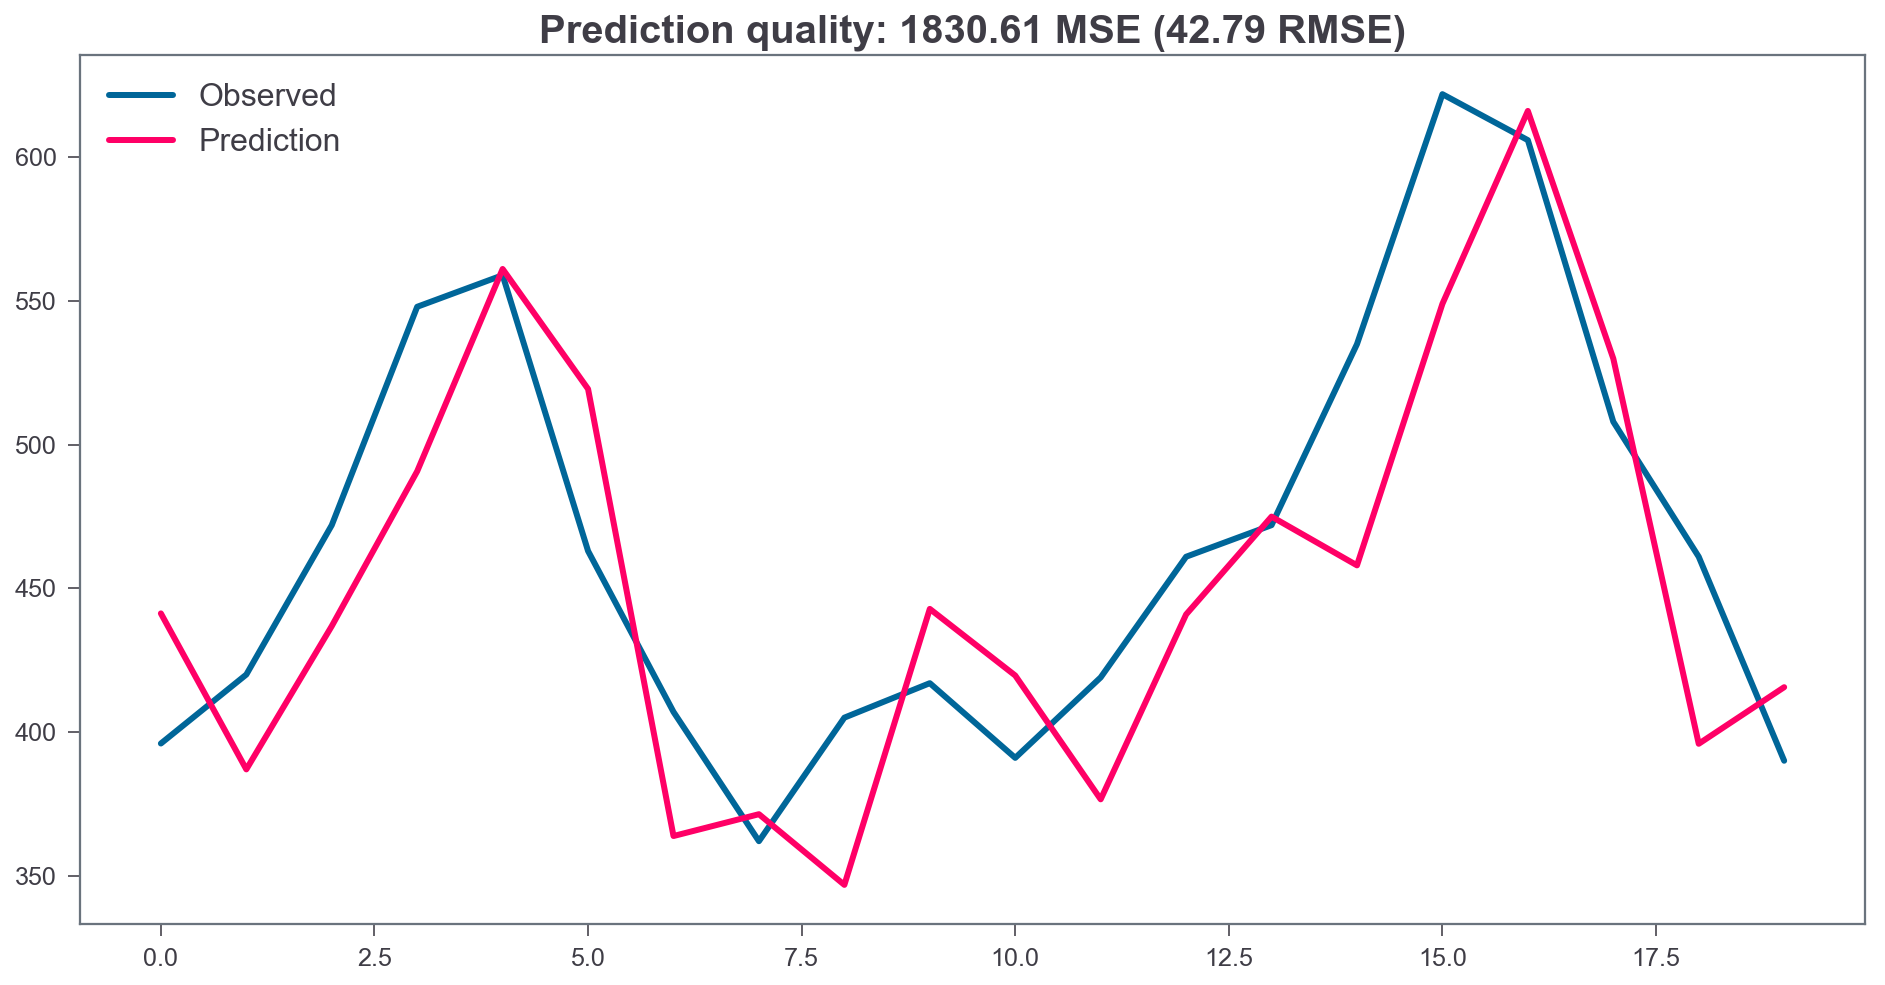

In [115]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.savefig('./img/lstm_close.png')
plt.show()